In [1]:
import graph_tool.all as gt
from packing_coloring.graph_generator import *
from packing_coloring.utils import *
from packing_coloring.algorithms.problem import *

from packing_coloring.algorithms.constructive.greedy_algo import *
from packing_coloring.algorithms.constructive.neighborhood.betweenness import *
from packing_coloring.algorithms.constructive.neighborhood.closeness import *
from packing_coloring.algorithms.constructive.neighborhood.random import *

from packing_coloring.algorithms.constructive.rlf_algo import *
from packing_coloring.algorithms.constructive.swo_algo import *
from packing_coloring.algorithms.perturbative.tabupackcol import *
from packing_coloring.algorithms.perturbative.genetic_algo import *

import numpy as np
import pandas
import igraph
np.set_printoptions(threshold=np.nan)

from IPython.html.widgets import interactive
from IPython.display import display
from os import listdir
from os.path import join, isfile
from pylab import get_cmap

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
#def deg_sample():
#    if np.random.random() > 0.5:
#        return np.random.poisson(3)
#    else:
#        return np.random.poisson(5)
#g = gt.random_graph(15, deg_sample, directed=False, parallel_edges=False)

#g = gt.load_graph("instances/dot_format/random.dot")
size = 3
g = gt.lattice([size, size])

#g = generator.dodecahedral_graph()

pos = gt.sfdp_layout(g, cooling_step=0.95, epsilon=1e-2)
dist_mat = get_distance_matrix(g)
prob = GraphProblem(dist_mat)

In [3]:
pos = gt.sfdp_layout(g, max_iter=1)
for i,v in enumerate(g.vertices()):
    pos[v][1] = np.floor(i/size)*2
    pos[v][0] = (i%size)*2

In [27]:
text_v = g.new_vertex_property("int")
text_v.a = np.arange(prob.v_size)
gt.graph_draw(g, pos=pos, vertex_text=text_v, output_size=(500,500), output="G3x3.pdf")


<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f642d73cf98, at 0x7f642d6fa160>

In [5]:
eval_func = lambda a: a.get_sum()

p_col1 = hybrid_algorithm(prob, partial_pack_col, 10, swo_algorithm, eval_func, 10)

text_v = g.new_vertex_property("int")
text_v.a = p_col1.pack_col.astype(int)
gt.graph_draw(g, pos=pos, vertex_text=text_v, output_size=(500,500), output="G3x3_4pcol.pdf")

np.max(p_col1)

init candidate # 0
init candidate # 1
init candidate # 2
init candidate # 3
init candidate # 4
init candidate # 5
init candidate # 6
init candidate # 7
init candidate # 8
init candidate # 9
3
4
3
4
3
3
4
3
4
3
3
4
3
4
3
3
4
3
4
3
3
4
3
4
3
3
4
3
4
3
3
4
3
4
3
3
4
3
4
3
3
4
3
4
3
3
4
3
4
3
[[ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]]
generation # 10
3
4
3
4
3
4
5
4
5
4
5
4
3
4
3
4
3
[[ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]]
generation # 9
3
4
3
4
3
4
5
4
5
5
4
3
4
3
4
3
[[ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]]
generation # 8
3
4
3
4
3
4
5
4
5
4
5
4
3
4
3
4
3
[[ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]]
generation # 7
3
4
3
4
3
4
5
4
5
4
5
4
3
4
3
4
3
[[ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18]
 [ 4 18

4

In [11]:
max_col = p_col1.get_max_col()
col = [c/max_col for c in p_col1]
col_v = g.new_vertex_property("float")
col_v.a = np.array(col)

text_v = g.new_vertex_property("int")
text_v.a = p_col1.pack_col.astype(int)

gt.graph_draw(g, pos=pos, vertex_text=text_v, output_size=(500,500), vertex_fill_color=col_v, vcmap=get_cmap("Set1"), output="G3x3_5pcol.pdf")

print(np.max(p_col1))
print(count_conflicting_edge(prob, p_col1))
print(p_col1)

5
0.0
[1 2 1 3 1 4 1 5 1]


In [25]:
print(np.unique(col_v.a))

[  9.32132034  10.2         10.87423461  11.44264069  11.94341649
  12.39615242  12.81248608  13.2         13.56396103  13.90820393
  14.23562364  14.54846923  14.84852927  15.13725393  15.41583836
  15.68528137  15.94642784  16.2       ]


16
15
14
13
14
15
14
15
14
15
14


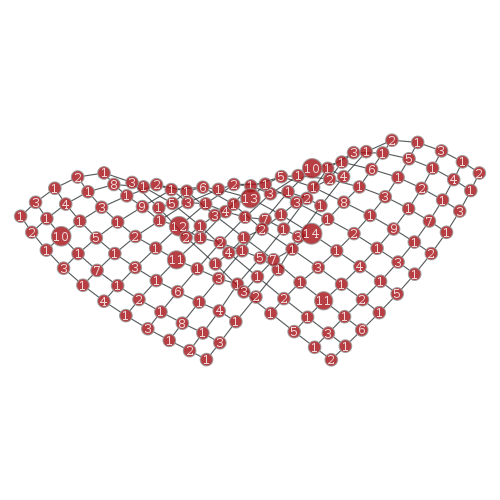

14

In [3]:
p_col2 = partial_pack_col(prob, sol=None, k_count=5, max_iter=5000)

text_v = g.new_vertex_property("int")
text_v.a = p_col2.pack_col.astype(int)
gt.graph_draw(g, pos=pos, vertex_text=text_v, output_size=(500,500), inline=True)

np.max(p_col2)

In [ ]:
p_col3 = tabu_pack_col(prob, sol=p_col1, k_count=3, max_iter=1000)

text_v = g.new_vertex_property("int")
text_v.a = p_col3.pack_col.astype(int)
gt.graph_draw(g, pos=pos, vertex_text=text_v, output_size=(500,500), inline=True)

np.max(p_col3)

20


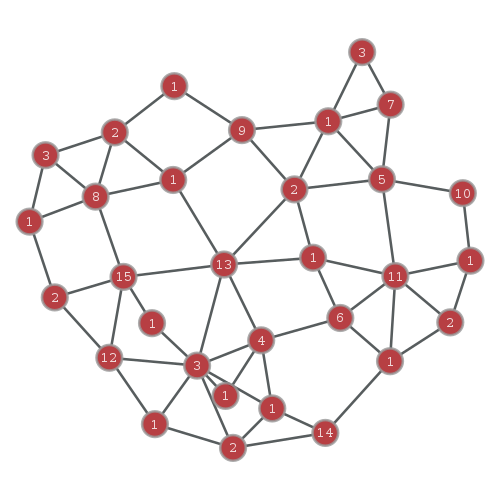

144


In [35]:
p_col4 = swo_algorithm(prob, blame_value=3, blame_rate=0.85, iter_count=10)

text_v = g.new_vertex_property("int")
text_v.a = p_col4.pack_col.astype(int)
gt.graph_draw(g, pos=pos, vertex_text=text_v, output_size=(500,500), inline=True)

np.max(p_col4)
print(np.sum(p_col4))

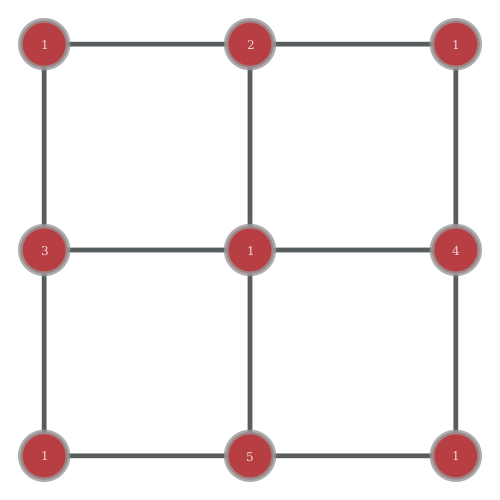

5

In [8]:
p_col = rlf_algorithm(prob)

text_v = g.new_vertex_property("int")
text_v.a = p_col.pack_col.astype(int)
gt.graph_draw(g, pos=pos, vertex_text=text_v, output_size=(500,500), inline=True)

np.max(p_col)

In [ ]:
p_col2 = tabu_pack_col(prob, 21, tt_a=25, max_iter=200)

text_v = g.new_vertex_property("int")
text_v.a = p_col2.pack_col.astype(int)
gt.graph_draw(g, pos=pos, vertex_text=text_v, output_size=(500,500), inline=True)

np.max(p_col2)

In [11]:
#print(np.max(prob.dist_matrix())
print(np.max(p_col1))
print(count_conflict(prob, p_col1))
gt.graph_draw(g, pos=pos, vertex_text=text_v, output_size=(500,500))

21
0


(<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7faf09333c18, at 0x7faf09333cf8>,
 <PropertyMap object with key type 'Vertex' and value type 'bool', for Graph 0x7faf09333c18, at 0x7faec836bc18, with values:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

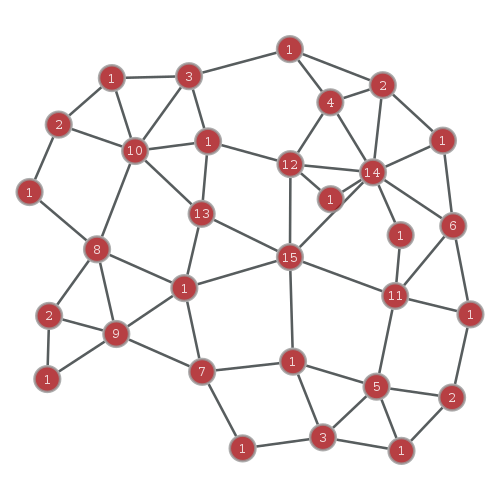

15.0

In [5]:
algo2 = greedy_algorithm(order_by_closeness)
p_col2 = algo2.solve(dist_mat)

text_v = g.new_vertex_property("int")
text_v.a = p_col2.astype(int)
gt.graph_draw(g, pos=pos, vertex_text=text_v, output_size=(500,500), inline=True)

np.max(p_col2)

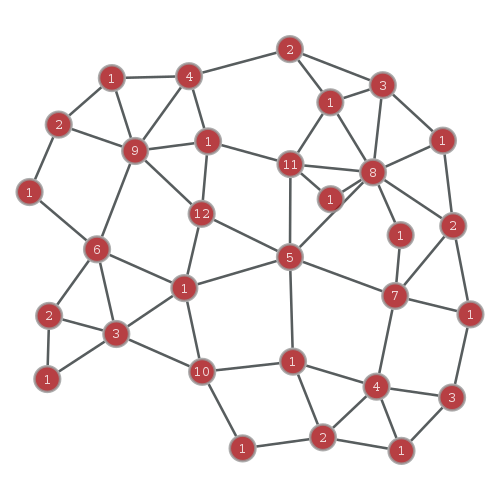

12.0

In [7]:
algo3 = Problem(g.num_vertices(), dist_mat)
p_col3 = algo3.solve(1, 0.1, 0.6, 10)

text_v = g.new_vertex_property("int")
text_v.a = p_col3.astype(int)
gt.graph_draw(g, pos=pos, vertex_text=text_v, output_size=(500,500), inline=True)

np.max(p_col3)

In [9]:
p_col1 = p_col